In [2]:
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from matplotlib.axes import Axes
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from axessettings import AxesSetting, linear_sim

In [3]:
R = 5.26e6

In [4]:
data = pd.read_excel("data.xlsx", sheet_name="(2)", skiprows=[1])
data.drop(index=[0], inplace=True)
data["V"] = data["V_m"] * 1e3
data["I"] = data["I"] * 1e-3
data["V"] = data["V"] - R * data["I"]

/tmp/ipykernel_229326/3561348581.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks()*1000)
/tmp/ipykernel_229326/3561348581.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks()/1000)


[Text(0, 200.0, '0.2'),
 Text(0, 400.0, '0.4'),
 Text(0, 600.0, '0.6'),
 Text(0, 800.0, '0.8'),
 Text(0, 1000.0, '1.0'),
 Text(0, 1200.0, '1.2'),
 Text(0, 1400.0, '1.4'),
 Text(0, 1600.0, '1.6'),
 Text(0, 1800.0, '1.8'),
 Text(0, 2000.0, '2.0'),
 Text(0, 2200.0, '2.2')]

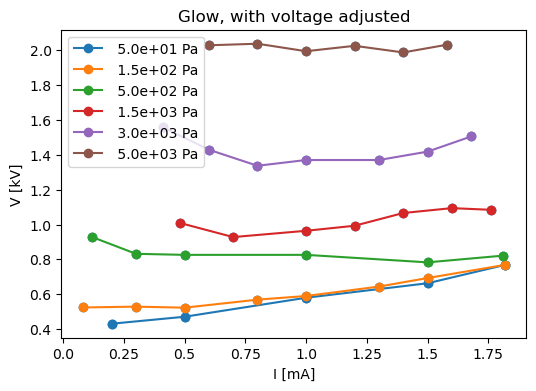

In [5]:
axstg = AxesSetting(title="Glow, with voltage adjusted", xlabel="I [mA]", ylabel="V [kV]")
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
for p, data_p in data.groupby("p"):
    ax.plot(data_p["I"], data_p["V"], "o", label=f"{p: .1e} Pa", linestyle="-")
ax.scatter(data["I"], data["V"])
axstg.apply_axes(ax)
ax.set_xticklabels(ax.get_xticks()*1000)
ax.set_yticklabels(ax.get_yticks()/1000)

低気圧ではほかの場所に抵抗流れている可能性あり